# FLAVOURS OF CACAO 

In [ ]:
In this study we are going to analyze chocolate bar ratings.
We are going to check the distribution of beans origin, company locations of different companies producing chocolates.
This will help in understanding how cocoa percentage in chocolates affects its ratings, where the best cocoa beans are grown, 
what companies produce the best chocolates in the worlds and which countries have the highest chocolate ratings and the number 
of chocolates were rated.

In [ ]:
Firstly, we are going to import the libraries we need

In [7]:
#install libraries
library(tidyverse);
library(dplyr);

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'tidyr' was built under R version 3.6.2"
Warning message:
"package 'stringr' was built under R version 3.6.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [ ]:
After installing the libraries, we then import the dataset we are going to analyze.

In [17]:
#import csv file
cocoa<- read.csv("flavors_of_cacao.csv",header = TRUE, stringsAsFactors=FALSE);


In [ ]:
The dataset was relatively clean, except for some misspellings and characters that are not of any help in the analysis.
I also removed the white spaces in the column names since they would bring difficulties when working the dataset.
The dataset has over 1700 rows and 11 variables. All of the variables are of significance in the data anlysis.

In [3]:
#check names 
names(cocoa)


[1] "CompanyÂ...Maker.if.known."       "Specific.Bean.Origin.or.Bar.Name"
[3] "REF"                              "Review.Date"                     
[5] "Cocoa.Percent"                    "Company.Location"                
[7] "Rating"                           "Bean.Type"                       
[9] "Broad.Bean.Origin"

In [ ]:
The names of the variables are going to be renamed to remove white spaces:

In [21]:
#rename column names
cocoa<-rename(cocoa, CompanyName=CompanyÂ...Maker.if.known.)
cocoa<-rename(cocoa, CocoaPercent=Cocoa.Percent)
cocoa<-rename(cocoa, BroadBeanOrigin=Broad.Bean.Origin)
cocoa<-rename(cocoa, ReviewDate=Review.Date)
cocoa<-rename(cocoa, CompanyLocation=Company.Location)
cocoa<-rename(cocoa, SpecificBeanOrigin=Specific.Bean.Origin.or.Bar.Name)
cocoa<-rename(cocoa, BeanType=Bean.Type)


In [ ]:
After renaming, we confirm whether all variable names have been renamed.

In [22]:
#check structure
str(cocoa);


'data.frame':	1795 obs. of  9 variables:
 $ CompanyName       : chr  "A. Morin" "A. Morin" "A. Morin" "A. Morin" ...
 $ SpecificBeanOrigin: chr  "Agua Grande" "Kpime" "Atsane" "Akata" ...
 $ REF               : int  1876 1676 1676 1680 1704 1315 1315 1315 1319 1319 ...
 $ ReviewDate        : int  2016 2015 2015 2015 2015 2014 2014 2014 2014 2014 ...
 $ CocoaPercent      : chr  "63%" "70%" "70%" "70%" ...
 $ CompanyLocation   : chr  "France" "France" "France" "France" ...
 $ Rating            : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ BeanType          : chr  "Â " "Â " "Â " "Â " ...
 $ BroadBeanOrigin   : chr  "Sao Tome" "Togo" "Togo" "Togo" ...


In [ ]:
We then convert CocoaPercent from character to numeric and ReviewDate to a factor, remove the "%" and replace it with "" and
also change misspellings made in the dataset.

In [23]:
#convert character vars to numeric variables.

cocoa$REF<- as.numeric(cocoa$REF)
cocoa$ReviewDate<- as.factor(cocoa$ReviewDate)


#Make percentage into decimal.
cocoa$CocoaPercent <- as.numeric(sub("%", "",cocoa$CocoaPercent,fixed=TRUE))


#Correct misspellings in the dataset
cocoa[cocoa == "Eucador"] <- "Ecuador"
cocoa[cocoa == "Domincan Republic"] <- "Dominican Republic"
cocoa[cocoa == "Niacragua"] <- "Nicaragua"

#check the structure afterwards
str(cocoa);

'data.frame':	1795 obs. of  9 variables:
 $ CompanyName       : chr  "A. Morin" "A. Morin" "A. Morin" "A. Morin" ...
 $ SpecificBeanOrigin: chr  "Agua Grande" "Kpime" "Atsane" "Akata" ...
 $ REF               : num  1876 1676 1676 1680 1704 ...
 $ ReviewDate        : Factor w/ 12 levels "2006","2007",..: 11 10 10 10 10 9 9 9 9 9 ...
 $ CocoaPercent      : num  63 70 70 70 70 70 70 70 70 70 ...
 $ CompanyLocation   : chr  "France" "France" "France" "France" ...
 $ Rating            : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ BeanType          : chr  "Â " "Â " "Â " "Â " ...
 $ BroadBeanOrigin   : chr  "Sao Tome" "Togo" "Togo" "Togo" ...


In [ ]:
After cleaning the data, we are going to study several distributions that can be plotted from the data we have. 
The distributions we are going to plot are:


#### (i).Distribution of ratings against its count

Rating,countRate
<dbl>,<int>
1.00,4
1.50,10
1.75,3
2.00,32
2.25,14
2.50,127
2.75,259
3.00,341
3.25,303


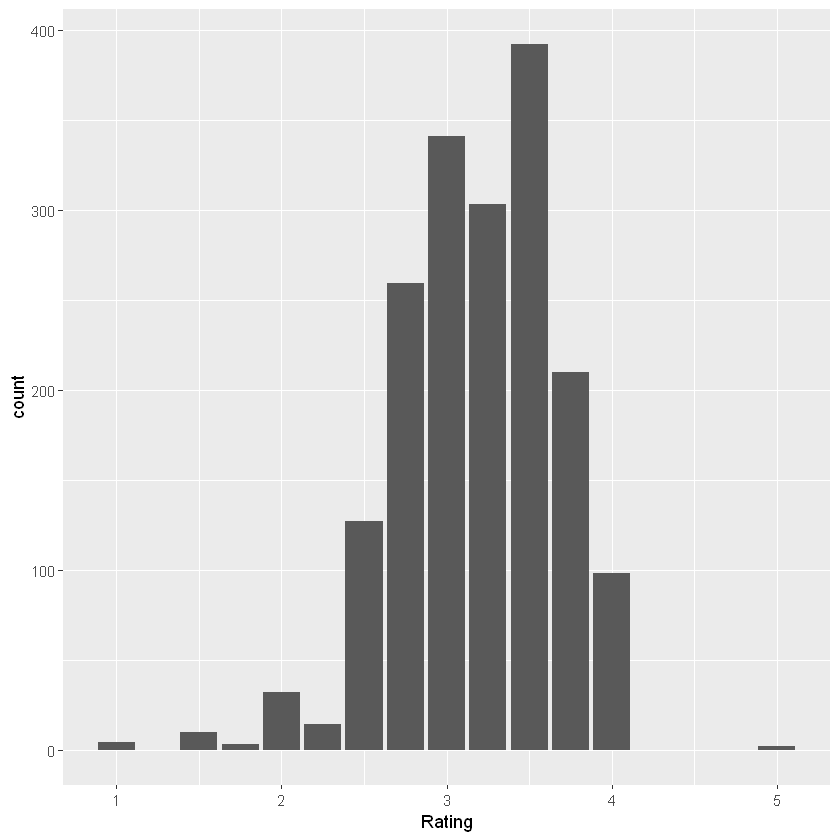

In [8]:
#Distribution  of ratings

cocoa %>%   group_by(Rating) %>%  summarise(countRate=n())

ggplot(cocoa, aes(x=Rating))+ geom_bar()


In [ ]:
This distribution shows that the most ratings given to chocolate bars 3.5 with the least being 1 and 5.

#### (ii) Distribution of CocoaPercentage against Ratings.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



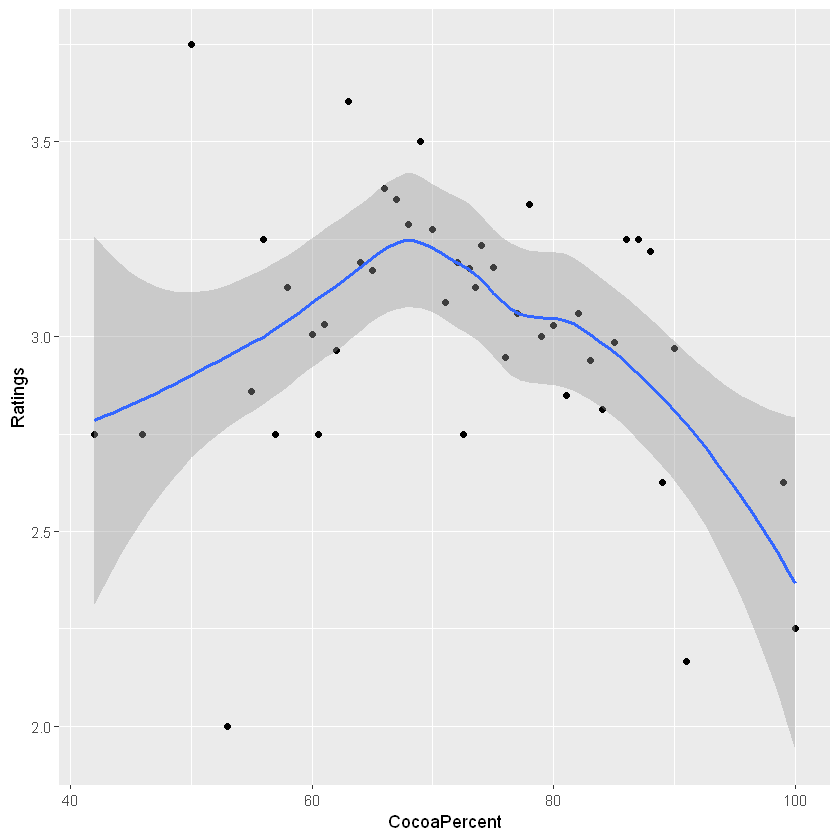

In [10]:
#Distribution of cocoa percent with ratings

cocoaPercent <- cocoa %>% group_by(CocoaPercent) %>% summarise(countRate=mean(Rating), num=n()) 

ggplot(cocoaPercent, aes(x=CocoaPercent, y=countRate))+geom_point()+ geom_smooth()+
ylab("Ratings"); 



In [ ]:
This distribution explains how concentration of cocoa in chocolate bars affects its ratings. 
Chocolate bars with low cocoa percentage have low ratings but those with extremely high cocoa percentage have even 
lower ratings. Chocolate bars that were rated highly have cocoa percentage ranging between 60 and 70. 

#### (iii) Distribution of Company Location against Ratings. 

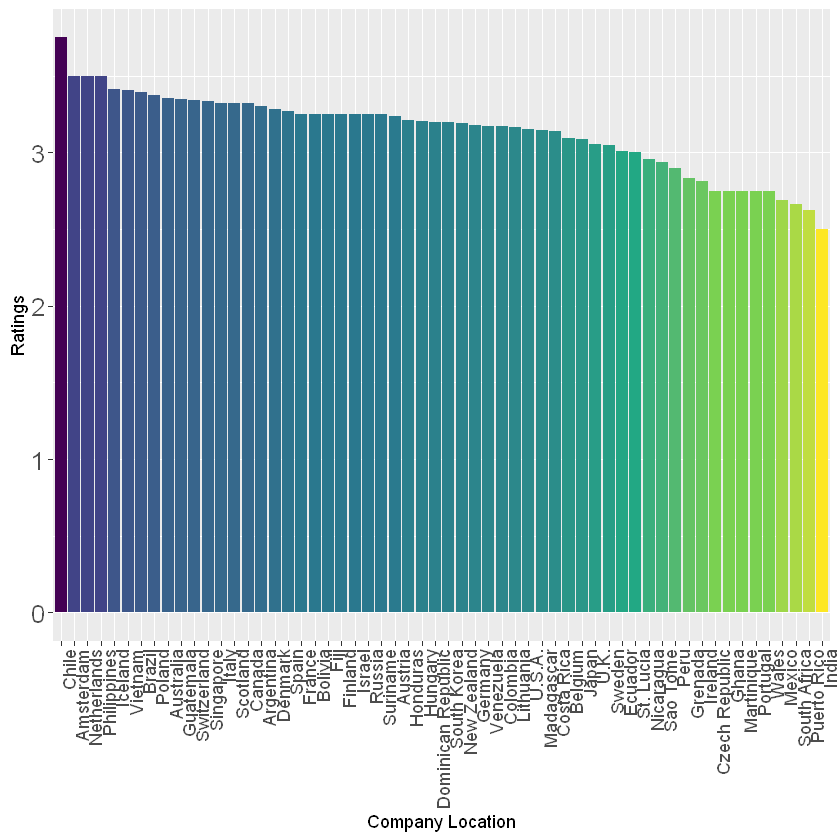

In [43]:
companyRatings<-cocoa %>% group_by(CompanyLocation) %>%  
  summarise(countRate=mean(Rating), num=n())%>%
  arrange(desc(countRate)) 

ggplot(companyRatings, aes(x=reorder(CompanyLocation, -countRate), y=countRate , fill=countRate, x.width=100))+geom_bar(stat="identity")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size=11), axis.text.y = element_text(size=15), legend.position="none") +
  scale_fill_continuous(trans = 'reverse', type="viridis")+ylab("Ratings")+xlab("Company Location")



In [ ]:
The above distribution explains from what country the chocolate bars with the most ratings originated. 
Chile produces the highest rated  chocolate bars and India produces the least rated chocolate bars.


#### (iv) Distribution of Companies with ratings for top 5 companies

CompanyName,countRate,num
<chr>,<dbl>,<int>
Tobago Estate (Pralus),4.000000,1
Heirloom Cacao Preservation (Zokoko),3.875000,2
Ocelot,3.875000,2
Amedei,3.846154,13
Matale,3.812500,4


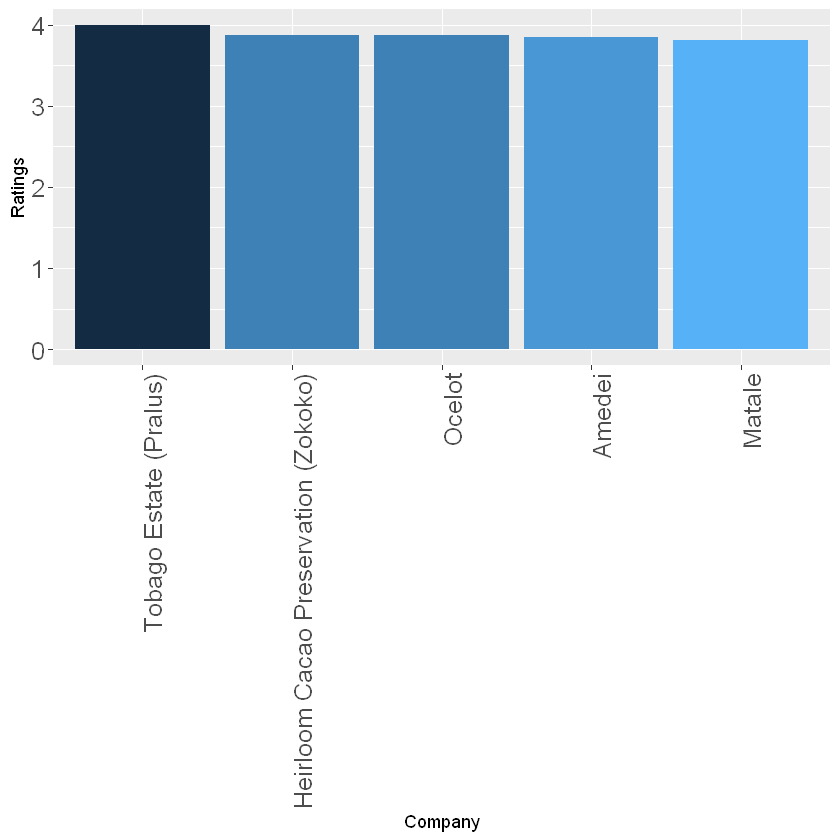

In [24]:
companiesRates<-cocoa %>% group_by(CompanyName) %>% summarise(countRate=mean(Rating), num=n()) %>%
  arrange(desc(countRate))
head(companiesRates,5)


ggplot(head(companiesRates,5), aes(x=reorder(CompanyName, -countRate), y=countRate , fill=countRate))+geom_bar(stat="identity")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size=15), axis.text.y=element_text(size=15) , legend.position="none") +
  scale_fill_continuous(trans = 'reverse', type="gradient")+xlab("Company")+ylab("Ratings")

In [ ]:
This distribution shows the top chocolate producing companies with rates as high as 4.

#### (v) Distribution of Specific Bean Origin against Ratings.

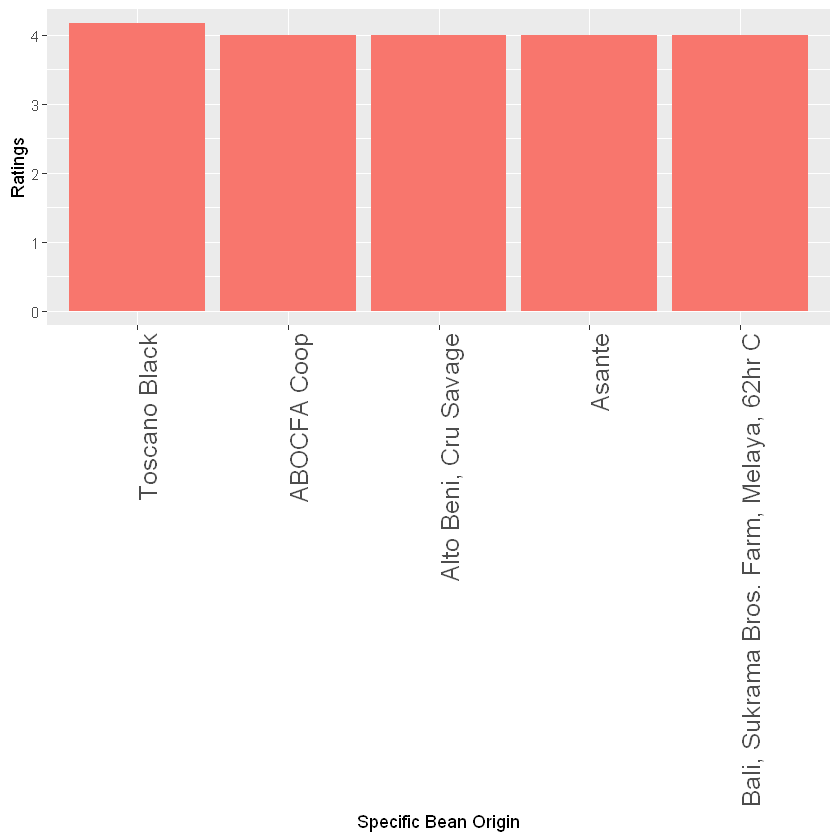

In [35]:
#Distribution of Specific Bean Origin with ratings

cocoaSBO<-cocoa %>% group_by(SpecificBeanOrigin) %>% summarise(countRate=mean(Rating), num=n()) %>%
  arrange(desc(countRate))
ggplot(head(cocoaSBO,5), aes(x=reorder(SpecificBeanOrigin, -countRate), y= countRate, fill="Orange"))+geom_bar(stat="identity")+ 
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size=15) , legend.position="none")+ylab("Ratings")+xlab("Specific Bean Origin")



In [ ]:
This distribution shows that the highest rated Bar Name for rated chocolate bars is "Toscano Black".

#### (i) Distribution of Bean Type against Ratings

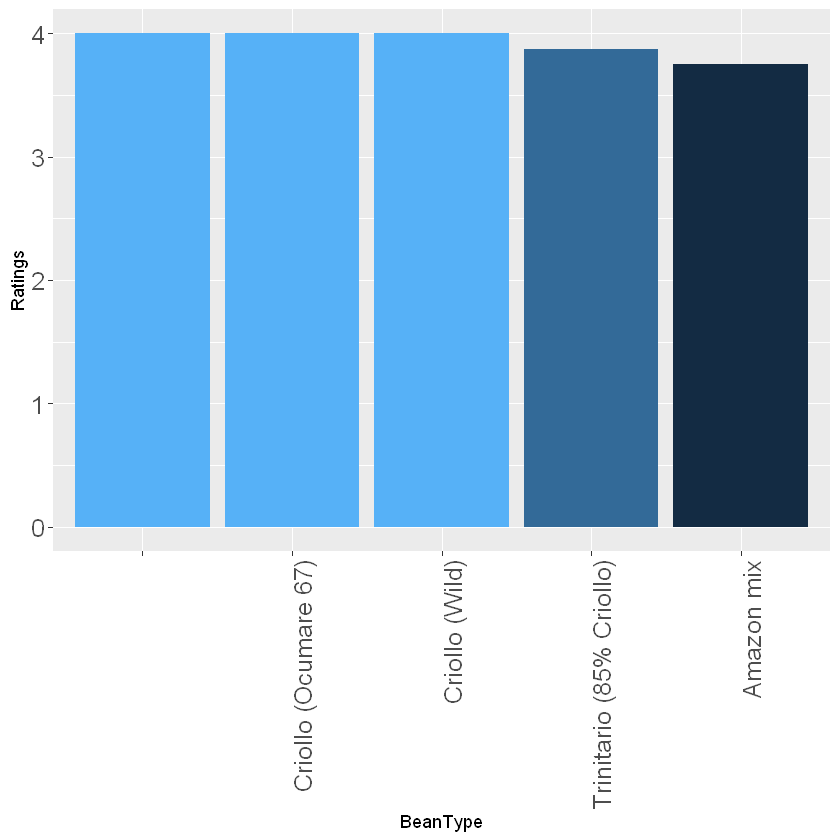

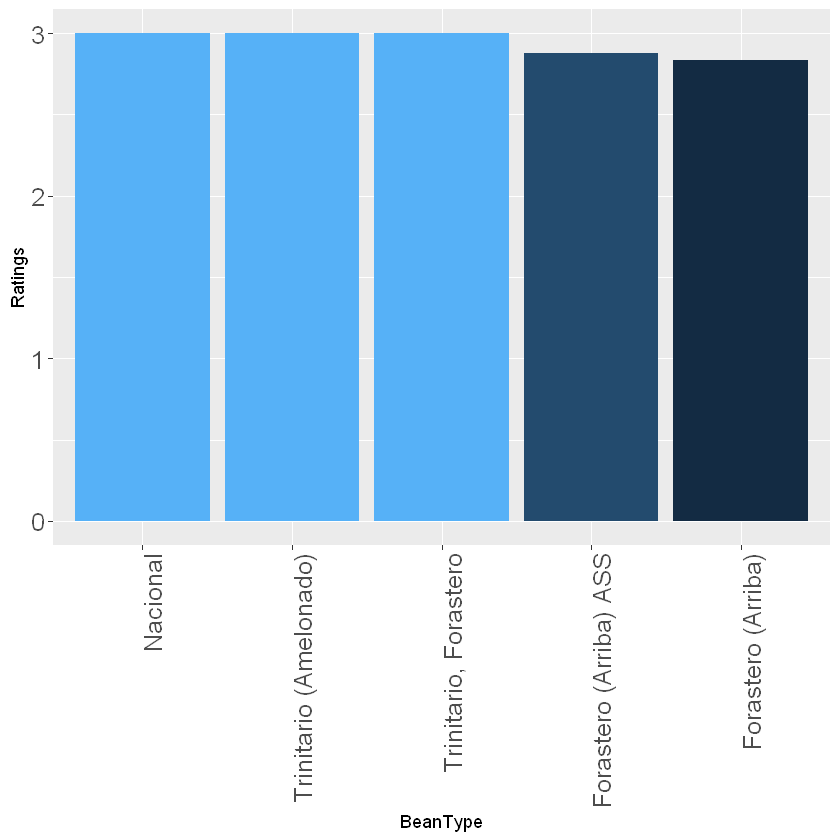

In [40]:
#BeanType against Ratings.
#Best rated
cocoaBT<-cocoa %>% group_by(BeanType) %>% summarise(countRate=mean(Rating), num=n()) %>%
  arrange(desc(countRate))
ggplot(head(cocoaBT,5), aes(x=reorder(BeanType, -countRate), y= countRate, fill=countRate))+geom_bar(stat="identity")+ 
  theme(axis.text.x = element_text(angle = 90, hjust = 1,size=15), axis.text.y=element_text(size=15) , legend.position="none")+ylab("Ratings")+
xlab("BeanType")

#Least rated
cocoaBT<-cocoa %>% group_by(BeanType) %>% summarise(countRate=mean(Rating), num=n()) %>%
  arrange(desc(countRate))
ggplot(tail(cocoaBT,5), aes(x=reorder(BeanType, -countRate), y= countRate, fill=countRate))+geom_bar(stat="identity")+ 
  theme(axis.text.x = element_text(angle = 90, hjust = 1,size=15), axis.text.y=element_text(size=15) , legend.position="none")+ylab("Ratings")+
xlab("BeanType")


In [ ]:
This distribution shows that the best chocolate producing cacaa beans are "Cacao Criollo(Ocumare 67)" and 
the least is "Forastero(Arriba)".